In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load train data

In [3]:
X_train = pd.read_csv("data/train_values.csv", index_col="building_id")
Y_train = pd.read_csv("data/train_labels.csv", index_col="building_id")

In [4]:
X_train.head(10)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
333020,8,558,6089,2,10,9,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
728451,9,475,12066,2,25,3,4,n,r,n,...,0,0,0,0,0,0,0,0,0,0
475515,20,323,12236,2,0,8,6,t,w,q,...,0,0,0,0,0,0,0,0,0,0
441126,0,757,7219,2,15,8,6,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train.head(10)

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3
333020,2
728451,3
475515,1
441126,2


In [6]:
print(X_train.shape)
print(Y_train.shape)

(260601, 38)
(260601, 1)


In [7]:
print(f"Columns' names:\n{X_train.columns.values}")


Columns' names:
['geo_level_1_id' 'geo_level_2_id' 'geo_level_3_id' 'count_floors_pre_eq'
 'age' 'area_percentage' 'height_percentage' 'land_surface_condition'
 'foundation_type' 'roof_type' 'ground_floor_type' 'other_floor_type'
 'position' 'plan_configuration' 'has_superstructure_adobe_mud'
 'has_superstructure_mud_mortar_stone' 'has_superstructure_stone_flag'
 'has_superstructure_cement_mortar_stone'
 'has_superstructure_mud_mortar_brick'
 'has_superstructure_cement_mortar_brick' 'has_superstructure_timber'
 'has_superstructure_bamboo' 'has_superstructure_rc_non_engineered'
 'has_superstructure_rc_engineered' 'has_superstructure_other'
 'legal_ownership_status' 'count_families' 'has_secondary_use'
 'has_secondary_use_agriculture' 'has_secondary_use_hotel'
 'has_secondary_use_rental' 'has_secondary_use_institution'
 'has_secondary_use_school' 'has_secondary_use_industry'
 'has_secondary_use_health_post' 'has_secondary_use_gov_office'
 'has_secondary_use_use_police' 'has_secondary_use

## Get all types

In [8]:
# print(X_train.dtypes)
for i in range(X_train.shape[1]):
    col_name = X_train.columns.values[i]
    print(f"{col_name} : {np.unique(X_train[col_name])} | {X_train.dtypes[i]}")

geo_level_1_id : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] | int64
geo_level_2_id : [   0    1    3 ... 1425 1426 1427] | int64
geo_level_3_id : [    0     1     3 ... 12564 12565 12567] | int64
count_floors_pre_eq : [1 2 3 4 5 6 7 8 9] | int64
age : [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 995] | int64
area_percentage : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  69  70  72  73  75
  76  77  78  80  82  83  84  85  86  90  96 100] | int64
height_percentage : [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 28 31 32] | int64
land_surface_condition : ['n' 'o' '

## Load test data

In [9]:
X_test = pd.read_csv("data/test_values.csv")

In [10]:
X_test.columns[0]

'building_id'

In [11]:
X_test.columns[28:39]

Index(['has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [12]:
print(X_test.shape)

(86868, 39)


## Map string values to ints

In [13]:
def get_mapping_dict(string_list):
    dict = {}
    for i in range(string_list.shape[0]):
        current_value = string_list[i]
        dict[current_value] = i

    return dict


temp = np.array(['h', 'i', 'r', 'u', 'w'])
print(get_mapping_dict(temp))

# X_train.columns[0]
np.unique(X_train["foundation_type"])

{'h': 0, 'i': 1, 'r': 2, 'u': 3, 'w': 4}


array(['h', 'i', 'r', 'u', 'w'], dtype=object)

In [14]:
def map_str_values(df):
    for i in range(df.shape[1]):
        col_name = df.columns[i]

        if (X_train[col_name].dtype == "object"):
            uniques = np.unique(df[col_name])
            map_dict = get_mapping_dict(uniques)
            df[col_name] = df[col_name].map(map_dict)

    return df

original_df = X_train.copy()
mapped_df = map_str_values(X_train)
        

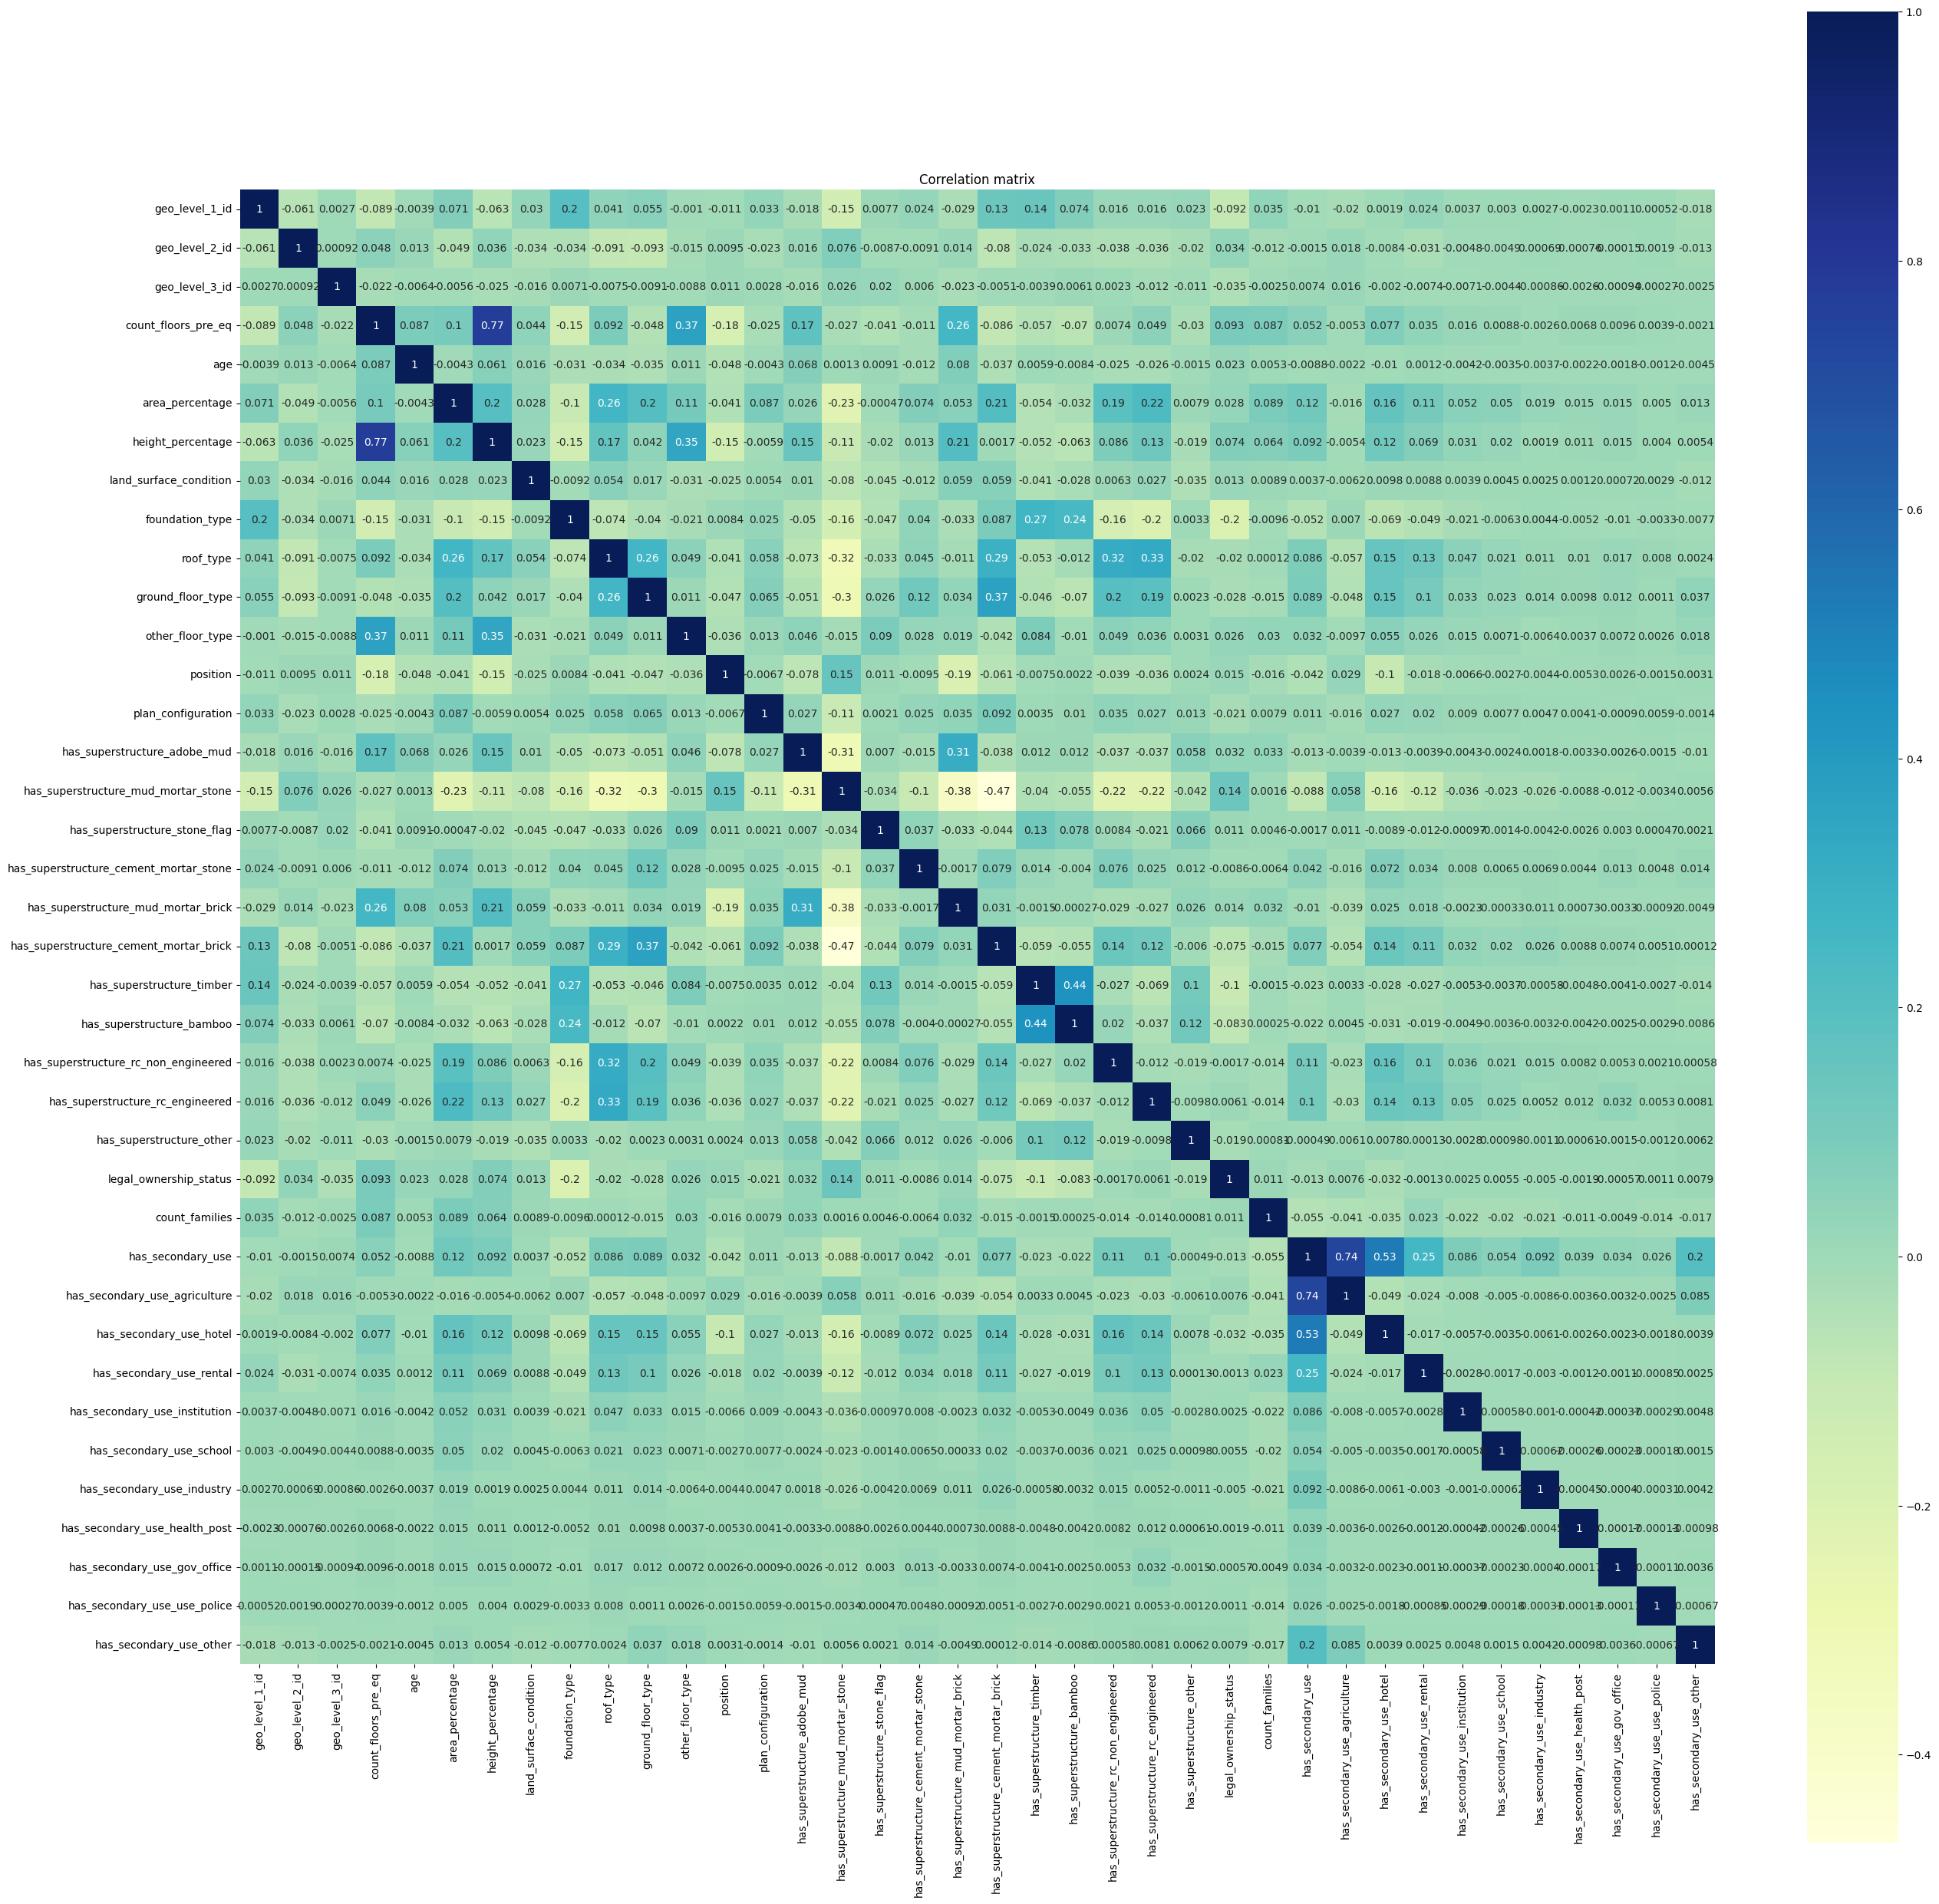

In [15]:
# X_corr= np.corrcoef(X_train.to_numpy().T)
X_corr = mapped_df.corr()

plt.figure(figsize=(31, 31))
sns.heatmap(X_corr, vmax=1,cmap="YlGnBu", square=True, annot=True)
plt.title('Correlation matrix')
plt.show()

In [16]:
mapped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   count_floors_pre_eq                     260601 non-null  int64
 4   age                                     260601 non-null  int64
 5   area_percentage                         260601 non-null  int64
 6   height_percentage                       260601 non-null  int64
 7   land_surface_condition                  260601 non-null  int64
 8   foundation_type                         260601 non-null  int64
 9   roof_type                               260601 non-null  int64
 10  ground_floor_type                       260601 non-null  int64
 11  

In [22]:
original_df.columns[0:7]

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage'],
      dtype='object')

In [18]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [19]:
np.unique(original_df.iloc[:,37])

array([0, 1], dtype=int64)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
binary_cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other']

continuous_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']


In [24]:
original_df[continuous_cols]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
building_id,,,,,,,,
802906,6,487,12198,2,30,6,5,1
28830,8,900,2812,2,10,8,7,1
94947,21,363,8973,2,10,5,5,1
590882,22,418,10694,2,10,6,5,1
201944,11,131,1488,3,30,8,9,1
...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,1
669485,17,715,2060,2,0,6,5,1
602512,17,51,8163,3,55,6,7,1
